In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_path = r"C:\Users\dhruv\Internship\Task_4\new_dataset_updated.csv"
data = pd.read_csv(file_path)
data

,location,total_sqft,price,number of bedrooms
0,Rural,1126.0,36.00,2.0
1,Rural,4500.0,345.00,4.0
2,Rural,4050.0,280.00,3.0
3,Urban,1770.0,90.00,3.0
4,Urban,2050.0,270.00,3.0
...,...,...,...,...
6655,Urban,1540.0,68.00,3.0
6656,Rural,2100.0,255.00,3.0
6657,Rural,1154.0,57.00,2.0
6658,Rural,700.0,34.99,2.0


In [23]:
data.describe()

,total_sqft,price,number of bedrooms
count,6660.00000,6660.000000,6651.000000
mean,1551.01353,112.294880,2.812209
std,1256.41773,150.195781,1.345807
min,1.26000,9.000000,1.000000
25%,1105.00000,50.000000,2.000000
50%,1275.00000,72.000000,3.000000
75%,1679.25000,120.000000,3.000000
max,52272.00000,3600.000000,43.000000


In [24]:
data

,location,total_sqft,price,number of bedrooms
0,Rural,1126.0,36.00,2.0
1,Rural,4500.0,345.00,4.0
2,Rural,4050.0,280.00,3.0
3,Urban,1770.0,90.00,3.0
4,Urban,2050.0,270.00,3.0
...,...,...,...,...
6655,Urban,1540.0,68.00,3.0
6656,Rural,2100.0,255.00,3.0
6657,Rural,1154.0,57.00,2.0
6658,Rural,700.0,34.99,2.0


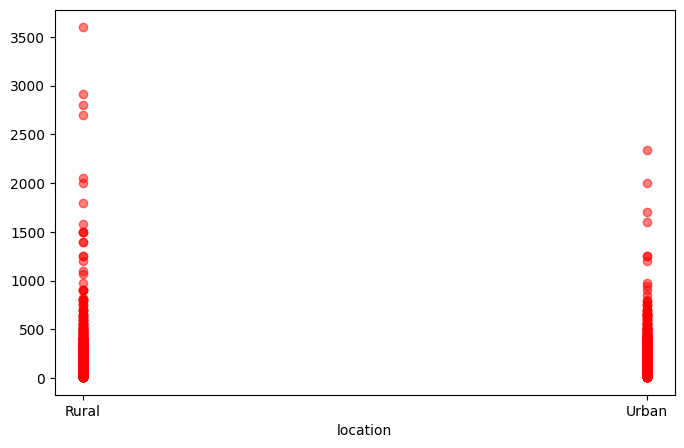

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(data['location'], data['price'], color = 'red', alpha=0.5)
plt.xlabel("location")
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['total_sqft', 'price', 'number of bedrooms']

scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data.head()

,location,total_sqft,price,number of bedrooms
0,Rural,0.021518,0.007519,0.023810
1,Rural,0.086066,0.093567,0.071429
2,Rural,0.077457,0.075466,0.047619
3,Urban,0.033838,0.022556,0.047619
4,Urban,0.039195,0.072682,0.047619


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_data = data.copy()
encoded_data['location'] = encoder.fit_transform(data['location'])

encoded_data.head(10)

,location,total_sqft,price,number of bedrooms
0,0,0.021518,0.007519,0.023810
1,0,0.086066,0.093567,0.071429
2,0,0.077457,0.075466,0.047619
3,1,0.033838,0.022556,0.047619
4,1,0.039195,0.072682,0.047619
5,0,0.022933,0.018379,0.047619
6,0,0.051630,0.053189,0.047619
7,0,0.022933,0.028126,0.071429
8,0,0.030586,0.006126,0.023810
9,0,0.041012,0.044834,0.047619


In [111]:
new_data = encoded_data.iloc[:len(encoded_data)//25]  
new_data

,location,total_sqft,price,number of bedrooms
0,0,0.021518,0.007519,0.023810
1,0,0.086066,0.093567,0.071429
2,0,0.077457,0.075466,0.047619
3,1,0.033838,0.022556,0.047619
4,1,0.039195,0.072682,0.047619
...,...,...,...,...
262,1,0.026760,0.016430,0.023810
263,1,0.032212,0.028126,0.047619
264,1,0.022933,0.011417,0.023810
265,1,0.020638,0.010025,0.023810


In [112]:
coorelation_matrix = new_data.corr()
print(coorelation_matrix['price'].sort_values(ascending=False))

price                 1.000000
total_sqft            0.592927
number of bedrooms    0.338238
location             -0.103696
Name: price, dtype: float64


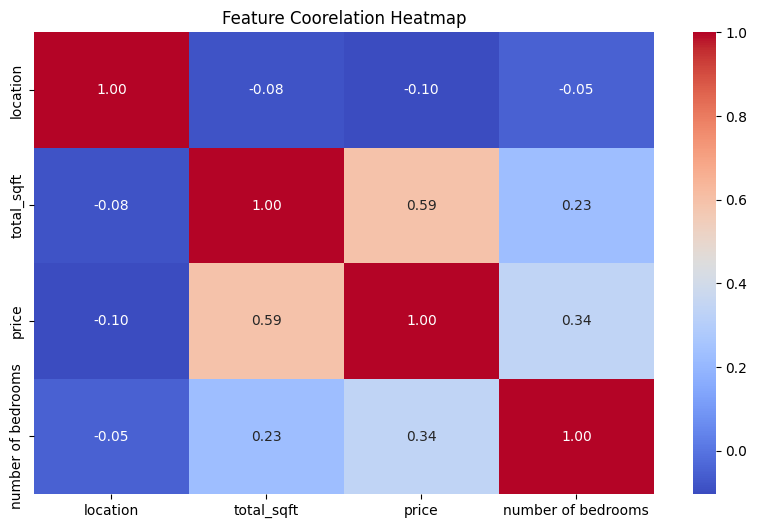

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(coorelation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.title("Feature Coorelation Heatmap")
plt.show()

In [216]:
from sklearn.model_selection import train_test_split

X = new_data.drop(columns = ['price'])
y = new_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

print(f"Training Set {X_train.shape}, {y_train.shape}")
print(f"Testing Set {X_test.shape}, {y_test.shape}")

Training Set (212, 3), (212,)
Testing Set (54, 3), (54,)


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.01
Root Mean Squared Error (RMSE): 0.02
R² Score: 0.7470430591996725


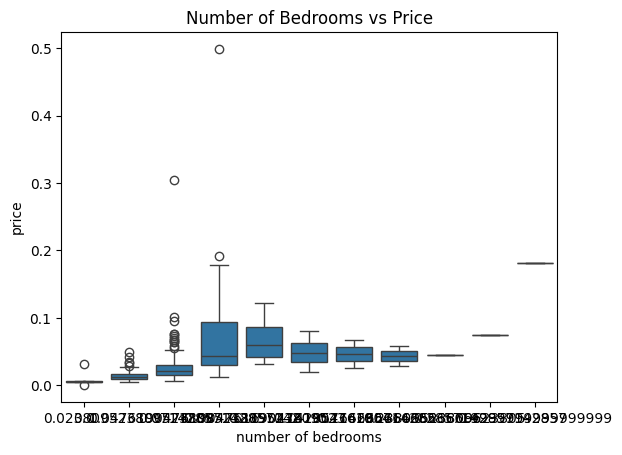

                    number of bedrooms     price
number of bedrooms            1.000000  0.338238
price                         0.338238  1.000000


In [222]:
sns.boxplot(x=new_data["number of bedrooms"], y=new_data["price"])
plt.title("Number of Bedrooms vs Price")
plt.show()

print(new_data[['number of bedrooms', 'price']].corr())  # Check correlation coefficient